In this notebook will learn what is the correlation and why is so important in AI projects

Dentro del proyecto existen dos carpetas:
* Numbers contiene los numeros escritos a mano del 0 al 9
* Test que contiene el numero 7 escrito a mano de diferentes formas

In [1]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
os.chdir('Numbers')

En una lista vamos a meter todas las imagenes para que sea mas facil escoger el numero o numeros con los que queremos trabajar.

In [3]:
img = []
for i in os.listdir():
    img.append(Image.open(i))

In [4]:
np.shape(img[0])

(20, 20, 3)

Como podemos ver, las imagenes son matrices de 3D por lo que dificulta un poco todo, para facilitarnos el trabajo, lo que hacemos en converitr a escala de grises y de esta manera tenemos solo una matriz de 2D.


In [5]:
for i in range(0,len(img)):
    img[i] = ImageOps.grayscale(img[i])

In [6]:
np.shape(img[0])

(20, 20)

Para facilitar todo aun mas, lo que tnemos que hacer es convertir la matriz de 2D en un vector, pero para ello hay que convetir cada matriz en un array de Numpy y luego "aplanarlo"

In [7]:
vec = {}
for i in range(0, len(img)):
    x = np.array(img[i])
    vec[i] = x.flatten(order='C') 
    


Finalmente creamos un dataframe donde las columnas es el numero y las filas es el valor del pixel que va desde 0 (blanco) a 255 (negro)

In [8]:
df = pd.DataFrame(vec)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255


Al aplanarlo y convertirlo en escala de grises, podemos ver cada imagen como una senal. De tarl forma que cada numero representa una forma unica. 

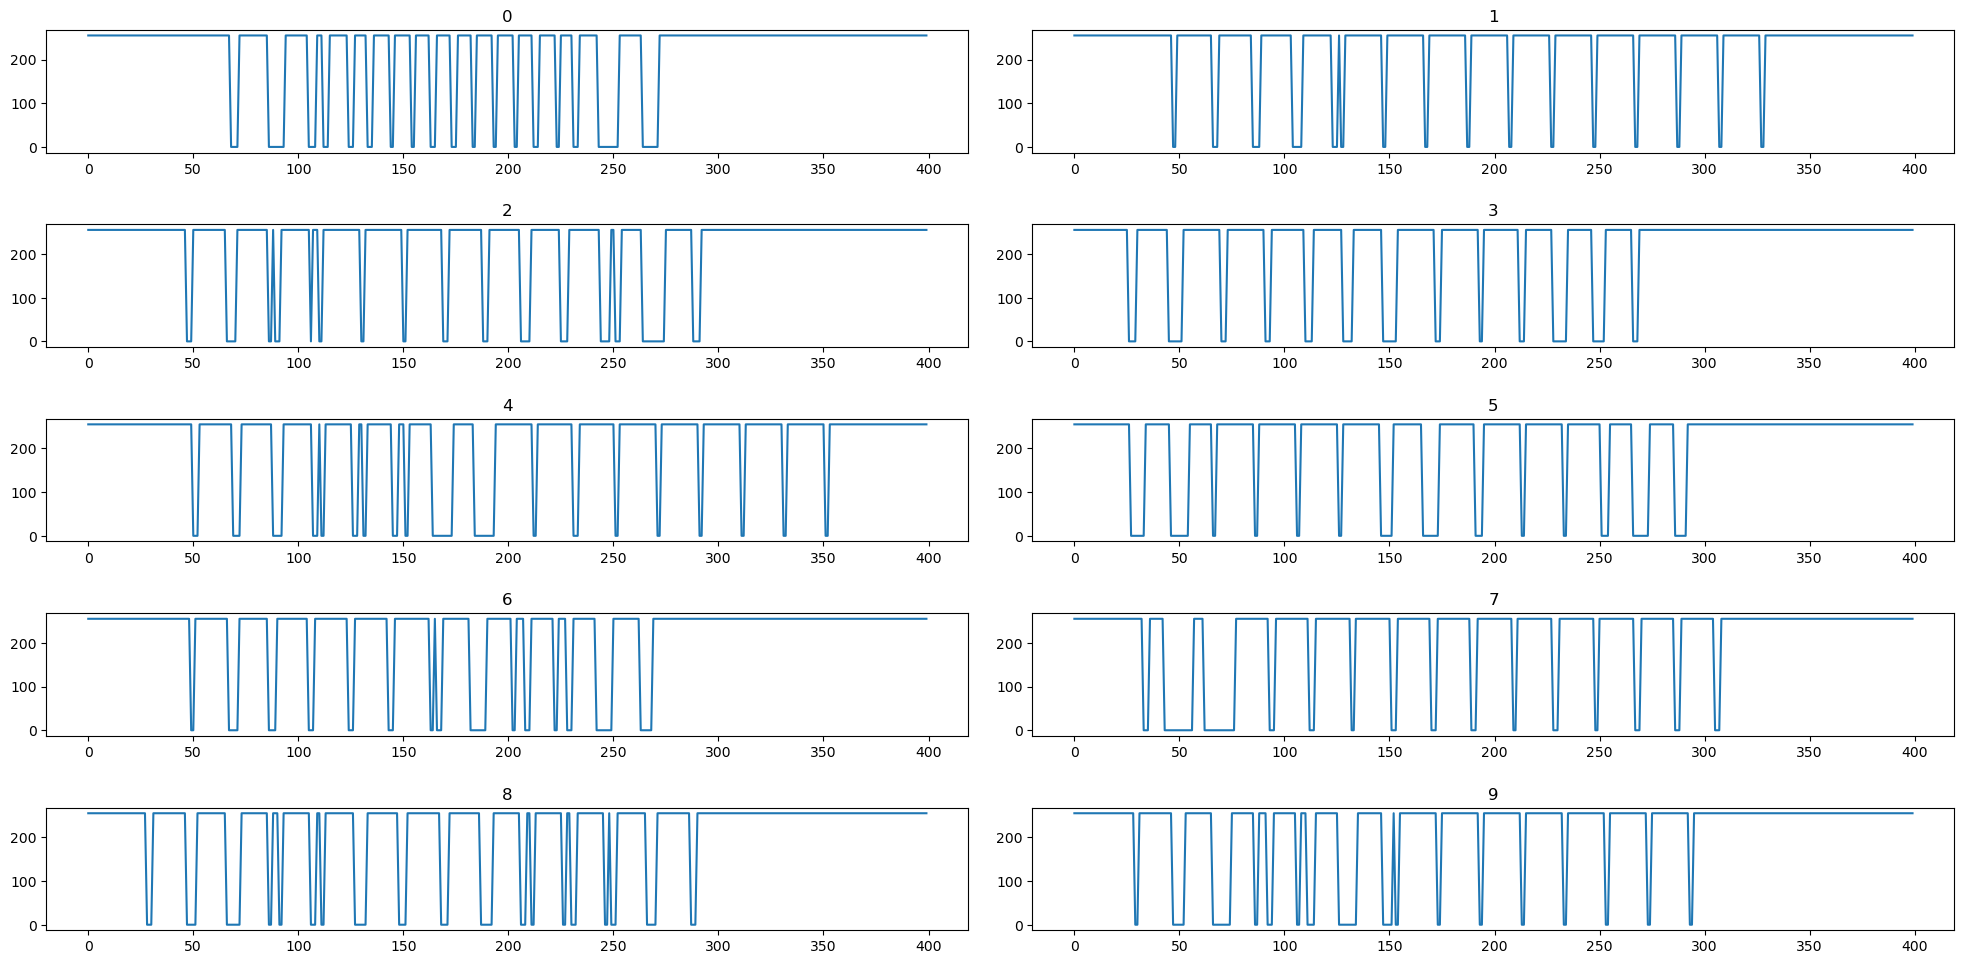

In [10]:
fig = plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(5,2,i)
    plt.plot(df[i-1])
    plt.title(i-1)
    
fig.tight_layout(pad=2.0)


In [11]:
os.chdir("..")

In [12]:
os.chdir("7")

## TEST

A continuacion lo que tenemos que hacer es cargar una nueva imagen y compara las senales para ver "cuanto se parecen entre si"

In [28]:
test = Image.open("7_02.png")

In [29]:
test

In [30]:
test = ImageOps.grayscale(test)

In [31]:
x = np.array(test)
x = x.flatten(order = "C")

A simple vista cuesta diferenciar que senal es la que se parece mas, tenemos el 1, 2 5 y 7 que se parecen bastante. Aqui es donde entra en juego el coeficiente de Pearson. Este nos va a indicar que fuerte es la correlacion de dos senales (cuanto se parecen o cuanto dependen entre si)

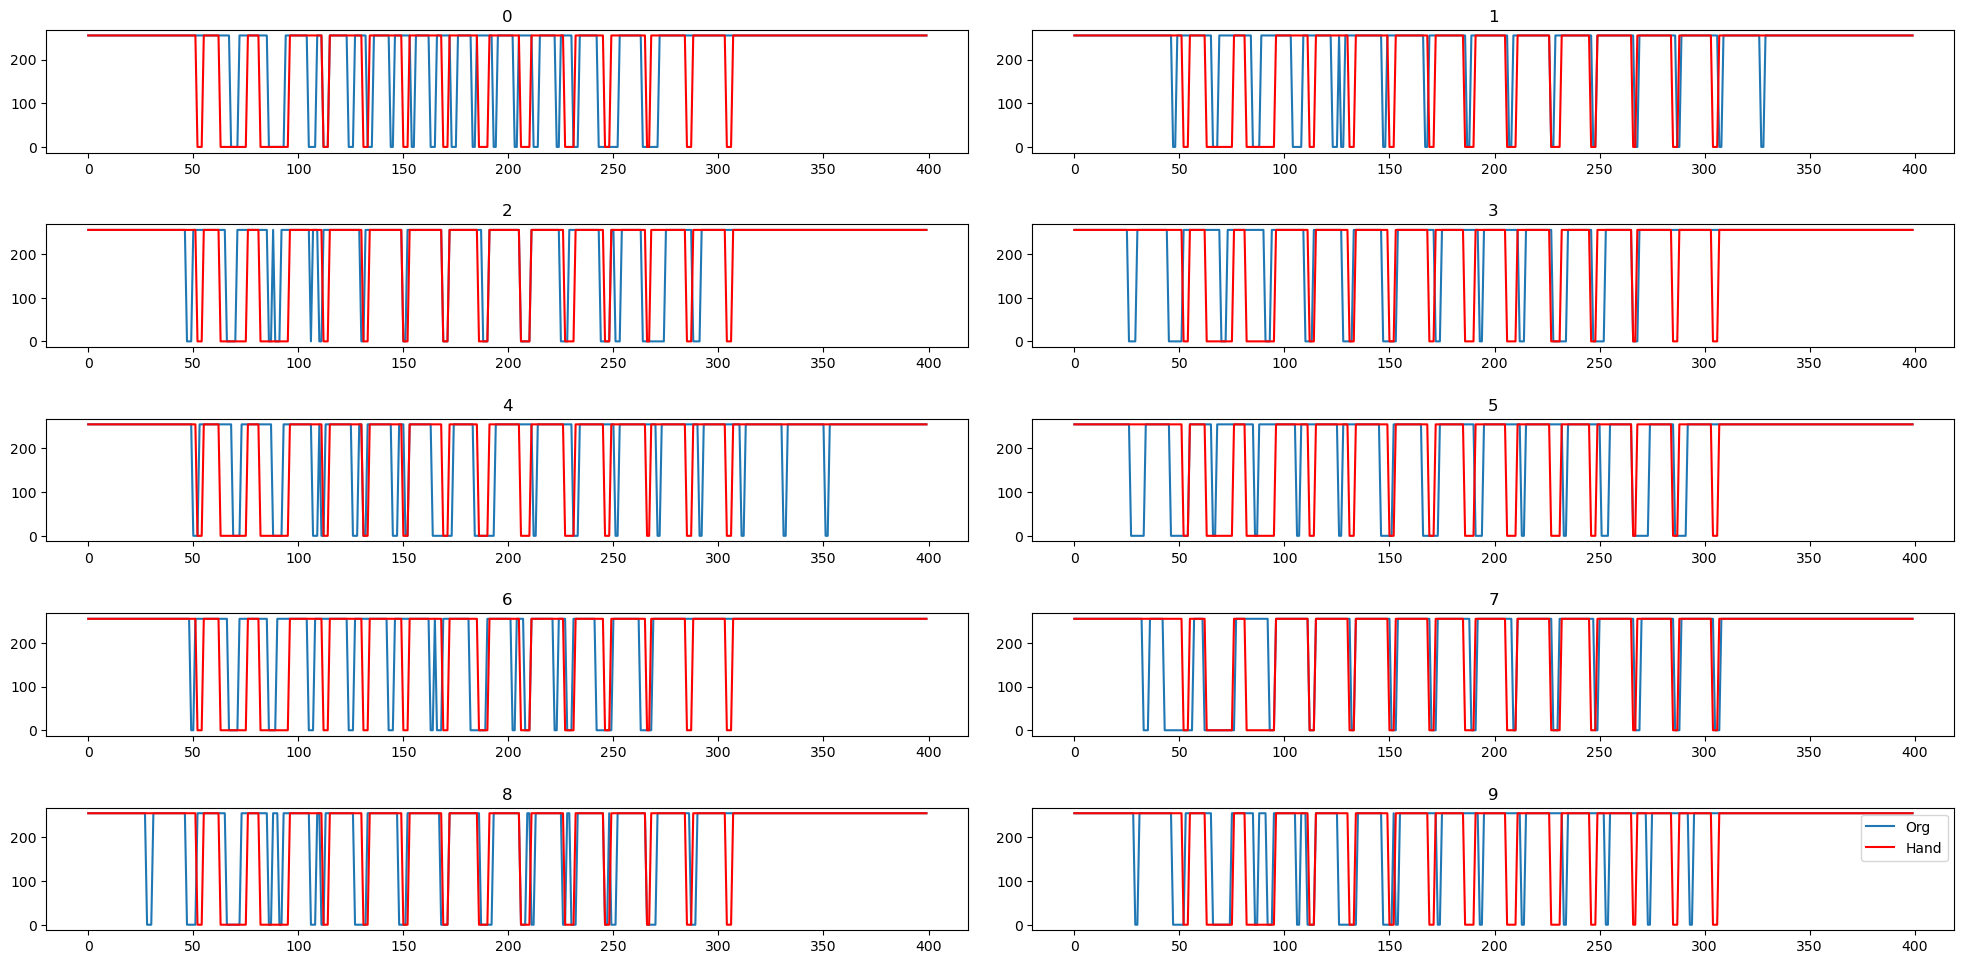

In [32]:
fig = plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(5,2,i)
    plt.plot(df[i-1], label = 'Org')
    plt.plot(x, color = 'r', label = 'Hand')
    plt.title(i-1)
    
fig.tight_layout(pad=2.0)
plt.legend()

Un coeficiente superiro a 0.5 significa que hay una alta correlacion y las senales son similares, por lo tanto es muy probable que sea ese el numero que estamos buscando

np.corrcoef devuelve una matriz con el coeficiente de correlacion de : <br>
x,x  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   x,y <br>
y,x   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  y,y <br>

In [33]:
coef = {}
for i in range(0,10):
    
    coef[i] = np.corrcoef(x,df[i])[0,1]

In [34]:
coef

{0: 0.18910036143088169,
 1: 0.2326640829083103,
 2: 0.39958982987266045,
 3: 0.21533499281836127,
 4: 0.23818296787430934,
 5: 0.09294945087777898,
 6: 0.2724530280486954,
 7: 0.5403239746667183,
 8: 0.4029744742650538,
 9: 0.24837324335509625}

<BarContainer object of 10 artists>

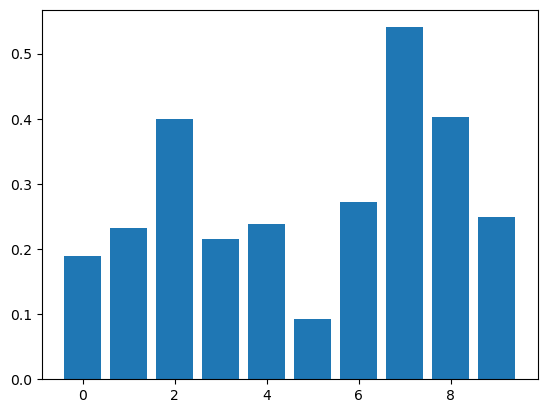

In [35]:
plt.bar(coef.keys(), coef.values())